F-score: 0.67
True Positive Rate (TPR): 0.77
False Positive Rate (FPR): 0.45


Text(0.5, 0, 'Histogram of peak in blue color channel 0-255')

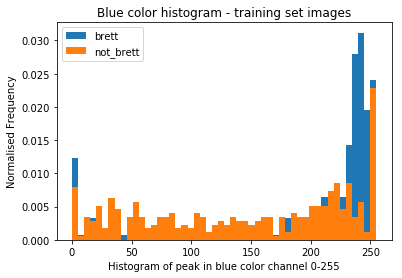

In [1]:
'''
Steve Winnall 10 Aug 2019
This code is work toward the Udacity Machine Learning NanoDegree Capstone Project
"The Art Thief - Is this a Whiteley?"
Using machine learning to identify a "fake" Brett Whiteley paiting.

Compare the histograms of the blue color channel for images belonging
to the Whiteley and non-Whiteley classes
'''

#imports
import cv2 
import glob
import numpy as np
import matplotlib.pyplot as plt                        
%matplotlib inline

#initial values
threshold = 180 #threshold for classification

#initialise variables
image = []
image_not = []
peak_list_not = list()
peak_list = list()

#for the non-Whiteley class, loop through the images in the training set and extract the blue color value
for filename in glob.glob('data/train/not_brett/*.jpg'):  
    image_not = cv2.imread(filename, cv2.IMREAD_UNCHANGED) #converts in bgr
    if image_not is None:
        continue
        
    #extract color channels
    blue_channel_not = image_not[2,:,:]
   
    #Compute histograms of color
    hist_not_blue = cv2.calcHist([blue_channel_not], [0], None, [256], [0, 256])
    
    #Convert histograms to simple list
    hist_not_blue = [val[0] for val in hist_not_blue]; 
    
    #Generate a list of indices
    indices = list(range(0, 256));

    #Descending sort-by-key with histogram value as key
    color_not = [(x,y) for y,x in sorted(zip(hist_not_blue,indices), reverse=True)]

    #Index of highest peak in color histogram
    index_first_peak_not = color_not[0][0];
    peak_list_not = np.append(peak_list_not, index_first_peak_not)

#for the Whiteley class, loop through the images in the training set and extract the blue color value
for filename in glob.glob('data/train/brett/*.jpg'):  
    image = cv2.imread(filename, cv2.IMREAD_UNCHANGED) #converts in bgr
    if image is None:
        continue
        
    #extract color channels
    blue_channel = image[:,:,2]

    #Compute histograms of color
    hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
    
    #Convert histograms to simple list
    hist_blue = [val[0] for val in hist_blue]; 
    
    #Generate a list of indices
    indices = list(range(0, 256));

    #Descending sort-by-key with histogram value as key
    color_peak = [(x,y) for y,x in sorted(zip(hist_blue,indices), reverse=True)]

    #Index of highest peak in color histogram
    index_first_peak = color_peak[0][0];
    peak_list = np.append(peak_list, index_first_peak)
    
#summation of each list

#calculate and print the F-score
normaliser_peak_list = len(peak_list) + len(peak_list_not)
#/ normaliser_peak_list

true_positives = sum(i > threshold for i in peak_list)  / normaliser_peak_list
true_negatives = sum(i < threshold for i in peak_list_not)  / normaliser_peak_list

false_positives = sum(i > threshold for i in peak_list_not)  / normaliser_peak_list
false_negatives = sum(i < threshold for i in peak_list)  / normaliser_peak_list

Fscore = (2*true_positives)/(2*true_positives + false_positives + false_negatives)

TPR = true_positives / (true_positives + false_negatives)
FPR = false_positives / (false_positives + true_negatives)

print("F-score: {:.2f}".format(Fscore))
print("True Positive Rate (TPR): {:.2f}".format(TPR))
print("False Positive Rate (FPR): {:.2f}".format(FPR))

#plotting of histograms
plt.hist(peak_list, 50, density=True, label = 'brett')
plt.hist(peak_list_not, 50, density=True, label = 'not_brett')
plt.legend(loc='upper left')
plt.title('Blue color histogram - training set images')
plt.ylabel('Normalised Frequency')
plt.xlabel('Histogram of peak in blue color channel 0-255')